## Support Vector Machine

Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression. 

Columns are:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: <=50K or >50K

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv("../Day14: Feature_Engineering/salary.csv")
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
18888,53,Local-gov,216931,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,4386,0,40,United-States,>50K
960,25,Private,150062,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,<=50K
26161,49,State-gov,324791,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
16464,67,Local-gov,176931,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,20,United-States,<=50K
9963,20,Private,289944,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,20,United-States,<=50K
26194,51,State-gov,42017,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
15899,23,Private,565313,Some-college,10,Never-married,Other-service,Own-child,Black,Male,2202,0,80,United-States,<=50K
19571,60,Self-emp-not-inc,92845,5th-6th,3,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
21808,22,Private,208946,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
10481,31,Private,129761,HS-grad,9,Never-married,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
data.columns

In [4]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Data Preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [7]:
data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

In [8]:
categorial_data = []
numerical_data = []
for col in data.columns:
    if data[col].dtype == "O":
        categorial_data.append(col)
    else:
        numerical_data.append(col)

In [9]:
le = LabelEncoder()

In [10]:
for category in categorial_data:
    data[category] = le.fit_transform(data[category])

In [11]:
data.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
78,18,4,309634,1,7,4,8,3,4,0,0,0,22,39,0
19190,17,4,29571,2,8,4,6,3,4,1,0,0,15,39,0
32555,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int64
 14  salary          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


### Feature Selection

In [13]:
from sklearn.feature_selection import chi2,mutual_info_classif,f_classif,VarianceThreshold

In [14]:
from sklearn.feature_selection import SelectKBest

In [15]:
varThresh = VarianceThreshold()
tranform_data = varThresh.fit_transform(data)

In [16]:
tranform_data.shape

(32561, 15)

In [17]:
data.shape

(32561, 15)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = data.drop('salary',axis=1)
y = data.salary

In [20]:
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.78,random_state=42)

In [22]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [24]:
selectK = SelectKBest(chi2,k=5)

In [25]:
selectK.fit(x_train,y_train)
x_trans = selectK.transform(x_train)

In [26]:
x_trans.shape

(25397, 5)

In [27]:
y_train.shape

(25397,)

In [32]:
model = model.fit(x_train,y_train)

In [33]:
predict = model.predict(x_test)

In [34]:
model.score(x_train,y_train)

0.8154506437768241

In [35]:
model.score(x_test,y_test)

0.8206309324399776

In [36]:
import numpy as np

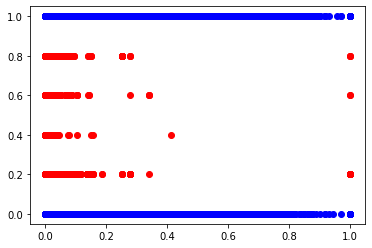

In [57]:
plt.scatter(x_trans[:,3],x_trans[:,1],c="red",label="3rd")
plt.scatter(x_trans[:,0],x_trans[:,2],c="blue",label="2nd")

In [ ]:
x_trans.

In [37]:
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

NameError: name 'x_max' is not defined

In [ ]:
import seaborn as sns

In [ ]:
xx.ravel().shape

In [ ]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=x_train.to_numpy()[:, 0], 
                y=x_train.to_numpy()[:, 1], 
                hue=y_train.to_numpy(), 
                s=8);
w = model.coef_[0]           # w consists of 2 elements
b = model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

In [ ]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(x_train.t[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

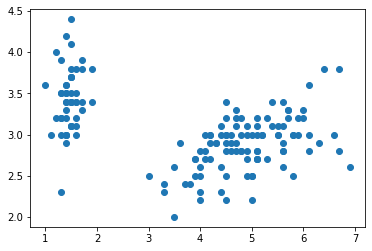

In [47]:
plt.scatter(X[:,2],X[:,1])